#ANN model to predict diabetes 

# ->Loading the necessary librabries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#-> Loading the dataset

In [ ]:
df = pd.read_csv("/content/diabetes.csv")

#**EDA :**

#->peeking at the dataset

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



# ->Let's see how many rows and columns we got!

In [ ]:
df.shape

(768, 9)

#->Let's see some facts here

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#->Let's get some statistics summary


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#->check for missing values.

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
age_diabetic = df[df.Outcome==1].Age


In [ ]:
age_non_diabetic  = df[df.Outcome==0].Age


#-> plotting histogram to check Age of maximum diabetic people

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


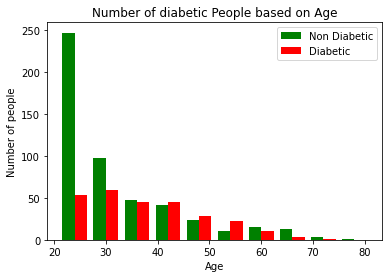

In [ ]:
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Number of diabetic People based on Age')
plt.hist([age_non_diabetic, age_diabetic], color=['green','red'], label=['Non Diabetic', 'Diabetic'])
plt.legend()


**It can be seen that Diabetics is prominent in people between the age of 25 - 45**

#-> Seperating the target variable

In [ ]:
X = df.drop('Outcome', axis = 'columns')
y = df.Outcome


In [ ]:
X.shape

(768, 8)

In [ ]:
y.shape

(768,)

#-> Scaling the Data

In [ ]:

from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(X)
x = pd.DataFrame(scaled_features, index=df.index, columns=X.columns)

#-> Splitting the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.2,
                                                    random_state=44)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(614, 8)
(154, 8)
(614,)
(154,)


#->Building the ANN model

In [ ]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras import models


In [ ]:
model = keras.Sequential()
model.add(layers.Dense(5, activation='relu',input_shape=(8,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size= 32, epochs=150)


Epoch 1/150
20/20 [==============================] - 1s 3ms/step - loss: 0.7926 - accuracy: 0.4267
Epoch 2/150
20/20 [==============================] - 0s 3ms/step - loss: 0.7582 - accuracy: 0.4739
Epoch 3/150
20/20 [==============================] - 0s 3ms/step - loss: 0.7277 - accuracy: 0.5163
Epoch 4/150
20/20 [==============================] - 0s 3ms/step - loss: 0.7017 - accuracy: 0.5717
Epoch 5/150
20/20 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.6091
Epoch 6/150
20/20 [==============================] - 0s 3ms/step - loss: 0.6592 - accuracy: 0.6450
Epoch 7/150
20/20 [==============================] - 0s 3ms/step - loss: 0.6421 - accuracy: 0.6596
Epoch 8/150
20/20 [==============================] - 0s 3ms/step - loss: 0.6268 - accuracy: 0.6906
Epoch 9/150
20/20 [==============================] - 0s 3ms/step - loss: 0.6128 - accuracy: 0.7020
Epoch 10/150
20/20 [==============================] - 0s 3ms/step - loss: 0.6005 - accuracy: 0.7231
Epoch 11/

#->Evaluate the model

In [ ]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.4482 - accuracy: 0.7792


[0.44819238781929016, 0.7792207598686218]

In [ ]:
yp = model.predict(X_test)
yp[:5]

array([[0.06736457],
       [0.8016551 ],
       [0.8099672 ],
       [0.06615512],
       [0.5133118 ]], dtype=float32)

In [ ]:
y_test[:5]

452    0
370    1
746    1
122    0
614    1
Name: Outcome, dtype: int64

#->Rounding off predictions to 0 and 1

In [ ]:
y_pred =[]
for i in yp:
  if i >= 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
y_pred[:10]

[0, 1, 1, 0, 1, 1, 0, 0, 0, 0]

In [ ]:
y_test[:10]

452    0
370    1
746    1
122    0
614    1
231    1
460    0
83     0
734    0
766    1
Name: Outcome, dtype: int64

#->From above y_pred and y_test; it can bee seen that our model is making only one error
# **train** accuracy **78%** and **test** accuracy of **77%**

#->Classification  report 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.96      0.83        90
           1       0.89      0.53      0.67        64

    accuracy                           0.78       154
   macro avg       0.82      0.74      0.75       154
weighted avg       0.81      0.78      0.77       154



#-> Confusion  matrix 

Text(69.0, 0.5, 'Truth')

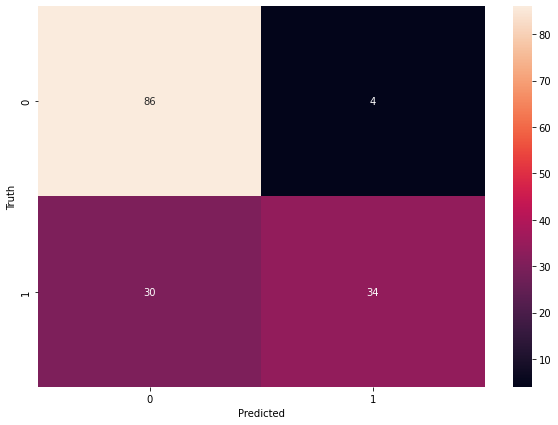

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')

plt.xlabel("Predicted")
plt.ylabel("Truth")